#### Fase 1: Cargue de datos, análisis visual de la red e identificación de actores relevantes 
**Grupo 14**
- Edna Julieth Mora Albarracin
- Elvin Rodrigo Mendez Gamba
- Juan Jose Miguel Ovalle Villamil

#### Librerias y Configuracion

In [2]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from operator import itemgetter
from pathlib import Path

DATA_PATH = Path("../data/")

In [3]:
os.listdir(DATA_PATH)

['Arcos.xlsx', 'Nodos.xlsx']

#### Lectura de datos

In [3]:
# Se cargan los datos de los nodos
nodos = pd.read_excel(DATA_PATH / "Nodos.xlsx")
print(f"Filas: {nodos.shape[0]:,}, Columnas: {nodos.shape[1]}")
# nodos.head()

Filas: 2,211, Columnas: 33


In [4]:
# Se cargan los datos de los arcos
arcos = pd.read_excel(DATA_PATH / "Arcos.xlsx")
print(f"Filas: {arcos.shape[0]:,}, Columnas: {arcos.shape[1]}")
# arcos.head()

Filas: 4,187, Columnas: 2


#### Analisis de calidad de datos

In [5]:
# Se inspeccionan los tipos de datos del conjunto de datos de los arcos
arcos.dtypes

Source    object
Target    object
dtype: object

In [6]:
# Se inspeccionan si existen valores duplicados en los arcos
arcos.duplicated().sum()

0

In [7]:
# Se inspeccionan si existen valores faltantes en los arcos
arcos.isna().sum()

Source    0
Target    0
dtype: int64

In [8]:
# Se inspeccionan los tipos de datos del conjunto de datos de los nodos
nodos.dtypes

Id                                                      object
Headquarters Location                                   object
Operating Status                                        object
Company Type                                            object
Number of Investments                                  float64
Number of Lead Investments                             float64
Number of Diversity Investments                        float64
Number of Exits                                        float64
Number of Lead Investors                               float64
Number of Investors                                    float64
Industry Groups                                         object
Industries                                              object
Number of Funding Rounds                               float64
Funding Status                                          object
Last Funding Date                               datetime64[ns]
Last Funding Amount                                    

In [9]:
# Se resumen los tipos de datos de los nodos
nodos.dtypes.value_counts()

float64           17
object            15
datetime64[ns]     1
Name: count, dtype: int64

In [10]:
# Se inspeccionan si existen valores duplicados en los nodos
nodos.duplicated().sum()

0

In [11]:
# Se inspeccionan si existen valores faltantes en los nodos
nodos.isna().sum().sort_values(ascending=False)

Aberdeen - IT Spend Currency (in USD)           1635
Aberdeen - IT Spend                             1635
Aberdeen - IT Spend Currency                    1632
Number of Events                                1240
Last Equity Funding Amount Currency             1200
Last Equity Funding Amount                      1200
Last Equity Funding Amount Currency (in USD)    1200
Number of Diversity Investments                 1152
Last Funding Amount Currency (in USD)           1146
Last Funding Amount Currency                    1146
Last Funding Amount                             1146
Number of Lead Investors                        1123
Funding Status                                  1080
Number of Investors                             1016
Total Funding Amount Currency                   1006
Total Funding Amount                            1006
Total Funding Amount Currency (in USD)          1006
Number of Exits                                 1004
Last Equity Funding Type                      

#### Analisis de datos

In [12]:
arcos.dtypes

Source    object
Target    object
dtype: object

Valores unicos Source: 1344


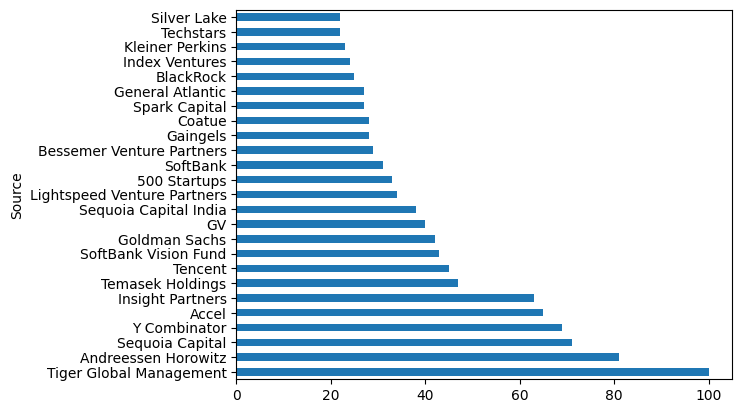

Valores unicos Target: 1100


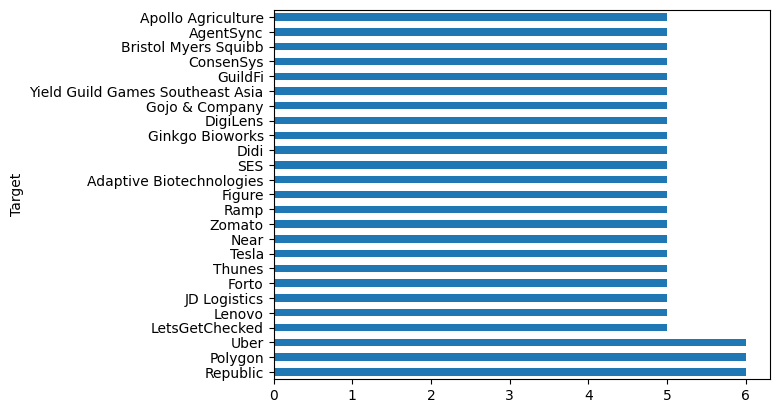

In [13]:
for each in arcos.columns:
    print(f"Valores unicos {each}: {arcos[each].nunique()}")
    arcos[each].value_counts().nlargest(25).plot(kind='barh')
    plt.show()

#### Creacion de red

In [14]:
# Se crea la red apartir de los datos de los arcos
G = nx.from_pandas_edgelist(
    df=arcos,
    source="Source",
    target="Target",
    create_using=nx.DiGraph() # Se asegura que la red sea dirigida
)

# Se inspecciona el numero de nodos y arcos
print(f"Nodos: {G.number_of_nodes():,}")
print(f"Arcos: {G.number_of_edges():,}")

Nodos: 2,165
Arcos: 4,187


In [15]:
arcos.shape

(4187, 2)

#### Analisis de la red

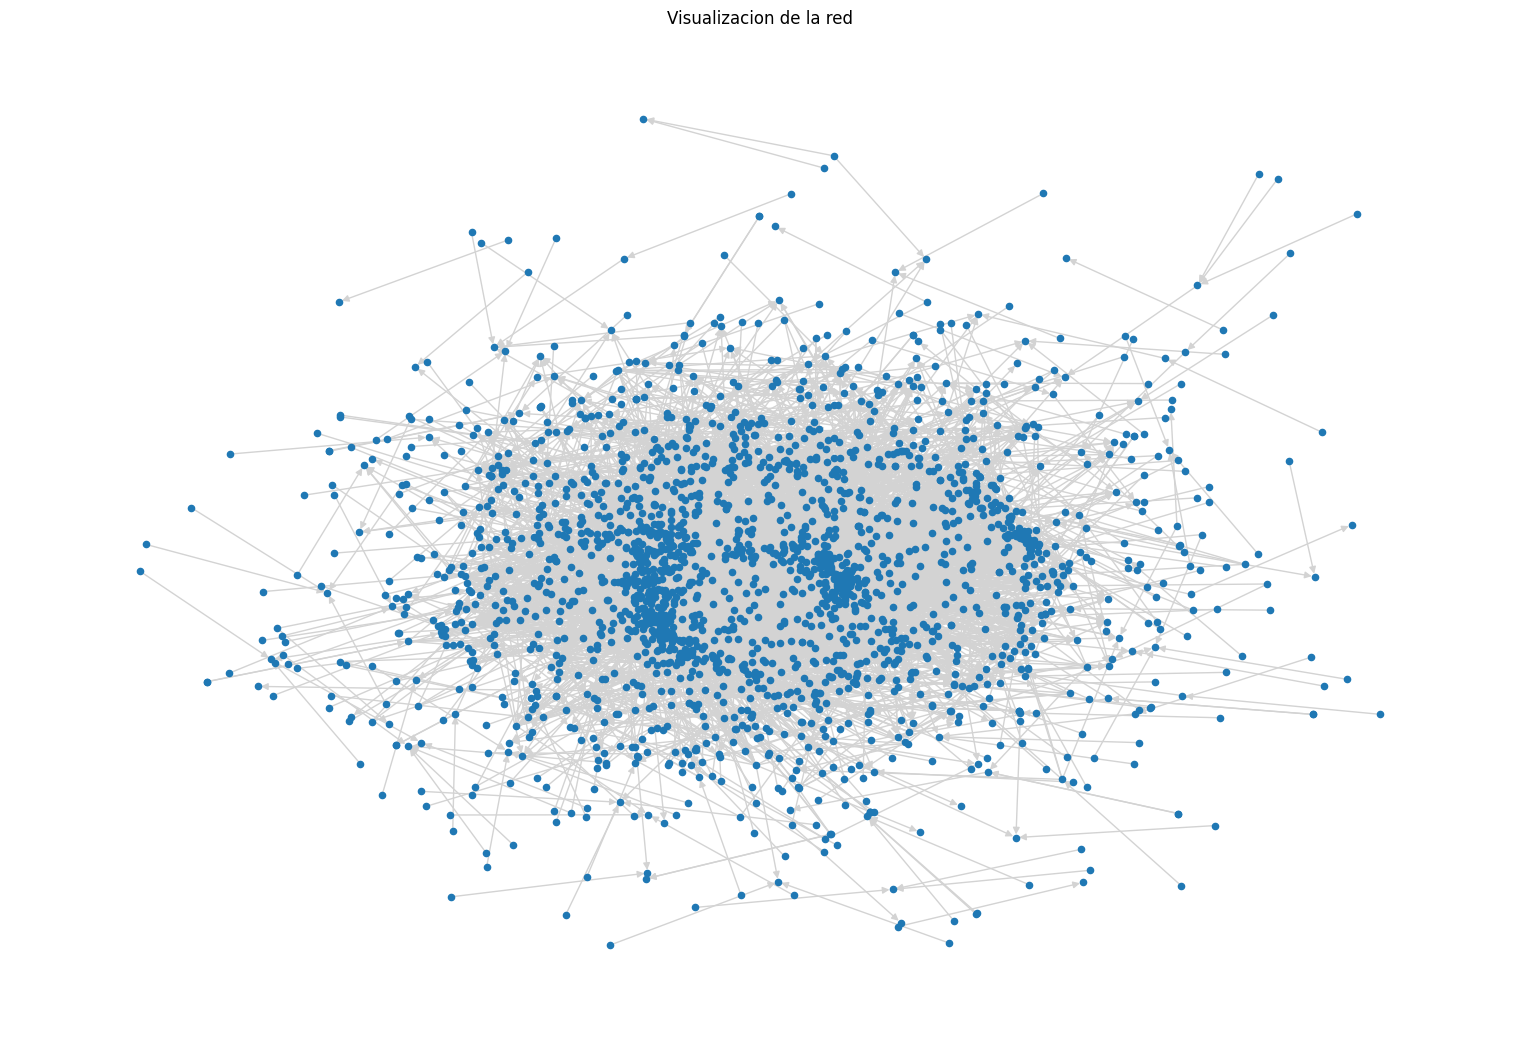

In [16]:
# # Se grafica la red
plt.figure(figsize=(15, 10))
nx.draw_kamada_kawai(
    G=G,
    node_size=20,
    edge_color='lightgray'
)
plt.title("Visualizacion de la red")
plt.show()

### Medidas de centralidad

Las medidas de centralidad a explorar son:
- **Grado**: Muestra inversores con mayor numero de conexiones. Los inversores altamente conectados pueden tener influencia significativa o tener acceso a información y acuerdos más diversos.
- **Centralidad Betweenness**: Identifica inversores que unen diferentes clusters o grupos de redes. Estos inversores tienen control sobre el flujo de información y pueden desempeñar un papel de "intermediario" entre partes que de otro modo estarían desconectadas.
- **Centralidad Eigenvector**: Mide la importancia de un inversor en función de sus conexiones con otros inversores bien conectados. Esto destaca a los jugadores conectados con otras figuras "centrales", incluso si ellos mismos no tienen muchos vínculos directos.

#### Grado de la red

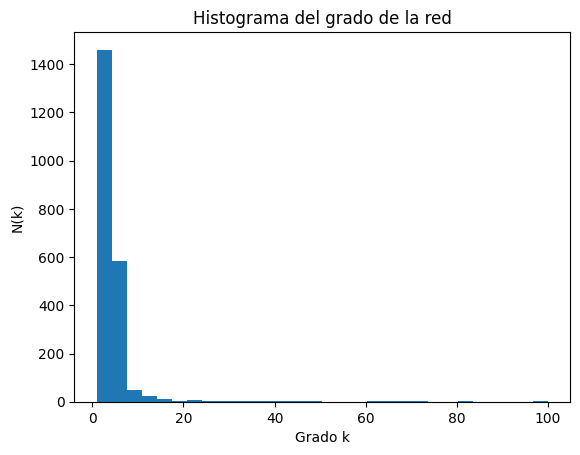

In [17]:
# Se calcula el grado de la red
grado = dict(G.degree())
plt.hist(list(grado.values()), bins=30)
plt.title('Histograma del grado de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

In [18]:
# Se calcula el grado promedio de la red
gradoProm = np.mean(list(grado.values()))
print(f"Grado promedio: {gradoProm}")

Grado promedio: 3.8678983833718243


In [19]:
# Se identifican los nodos con mayor grado
nodosGrado = dict(G.degree())
nodosGrado = sorted(nodosGrado.items(), key=itemgetter(1), reverse=True)
topgrado = nodosGrado[:10]
topgrado

[('Tiger Global Management', 100),
 ('Andreessen Horowitz', 81),
 ('Sequoia Capital', 71),
 ('Y Combinator', 69),
 ('Accel', 65),
 ('Insight Partners', 63),
 ('Tencent', 49),
 ('Temasek Holdings', 47),
 ('SoftBank Vision Fund', 43),
 ('Goldman Sachs', 42)]

El análisis del grado de la red revela interesantes patrones con respecto a la centralidad de los actores en esta red de inversores. El grado promedio de la red es 3.86, lo que indica que, en promedio, cada inversor está conectado a aproximadamente 4 otros inversores. Sin embargo, la distribución del grado está lejos de ser uniforme, como lo muestra el histograma. Existe una clara presencia de nodos con un grado mucho mayor, lo que significa que algunos inversores están significativamente más conectados que otros.

Los 10 inversores principales en términos de grado, que se muestran en la lista topgrado, ejemplifican este fenómeno. Actores como "Tiger Global Management" y "Andreessen Horowitz" poseen más de 80 conexiones, lo que los posiciona como actores centrales con amplia influencia potencial en la red. Es probable que estos inversores reciban mucha información y tengan acceso a una gran cantidad de oportunidades de inversión debido a su posición central.

En resumen, el análisis del grado de la red revela un panorama heterogéneo donde un grupo selecto de inversores altamente conectados ocupa posiciones centrales, lo que sugiere que pueden desempeñar un papel crucial en el flujo de información y la dinámica de financiamiento dentro de esta red.

#### Betweenness

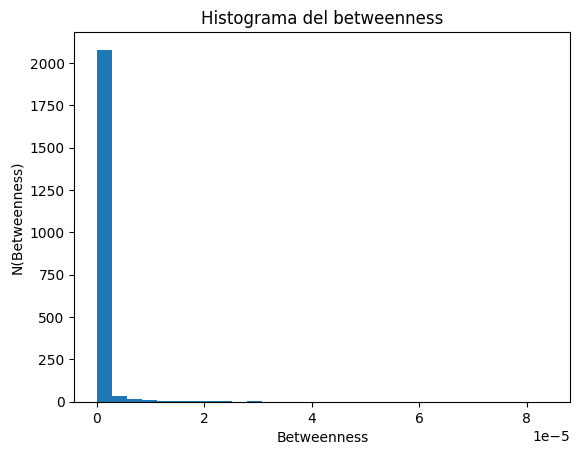

In [20]:
# Se calcula el betweenness
betweenness_centrality = nx.betweenness_centrality(G) 
plt.hist(list(betweenness_centrality.values()), bins=30)
plt.title('Histograma del betweenness')
plt.xlabel ("Betweenness")
plt.ylabel ("N(Betweenness)")
plt.show()

In [21]:
# Se calcula el betweenness promedio
betweennes_prom = np.mean(list(betweenness_centrality.values()))
print(f"Betweenness promedio: {betweennes_prom}")

Betweenness promedio: 5.263581293464177e-07


In [22]:
# Se identifican los nodos con mayor betweenness
topbetweenness = sorted(betweenness_centrality.items(), key=itemgetter(1), reverse=True)[:10]
topbetweenness

[('Animoca Brands', 8.39612265773815e-05),
 ('Tencent', 7.76587935391302e-05),
 ('Ubisoft', 4.6146628347873795e-05),
 ('Digital Currency Group', 3.471679215985876e-05),
 ('Mirae Asset Global Investments', 3.119170249439618e-05),
 ('Didi', 2.9268926313234767e-05),
 ('Google', 2.8200717323700653e-05),
 ('Bolt', 2.392788136556419e-05),
 ('Silver Lake', 2.2859672376030076e-05),
 ('SoftBank', 2.2005105184402783e-05)]

El examen de la centralidad de betweenness arroja luz sobre patrones que, aunque en algunos aspectos se asemejan a los identificados mediante el análisis de grado, ofrecen diferencias significativas y reveladoras. Notablemente, firmas como "Animoca Brands" y "Tencent" se destacan en el top 10, registrando índices de centralidad de betweenness que superan el umbral del 0.00008, lo que denota su papel crucial como conectores entre distintas fracciones de la red. A diferencia del análisis de grado, donde "Tiger Global Management" y "Andreessen Horowitz" se destacaban, este enfoque pone de relieve a otros participantes como "Ubisoft" y "Digital Currency Group", subrayando su importancia como nexos estratégicos en la estructura de la red.

La centralidad de betweenness promedio (5.263581293464177e-07), sugiere que la mayoría de los inversores desempeñan un rol menor en la conexión entre las distintas partes de la red. No obstante, la presencia de un grupo selecto con valores significativamente más altos de centralidad de betweenness subraya su capacidad para influir en la circulación de información y en las dinámicas de financiación, actuando como intermediarios fundamentales.

En resumen, el análisis de la centralidad de betweenness enriquece la comprensión de la red al identificar a aquellos inversores que no solo poseen una amplia conectividad, sino que también se sitúan en posiciones estratégicas, facilitando la interacción entre grupos diversos dentro de la red. Este enfoque destaca la importancia de considerar múltiples dimensiones de centralidad (tanto el grado como la centralidad de betweenness) para obtener una visión más integral del papel y la influencia potencial de los inversores en la red.

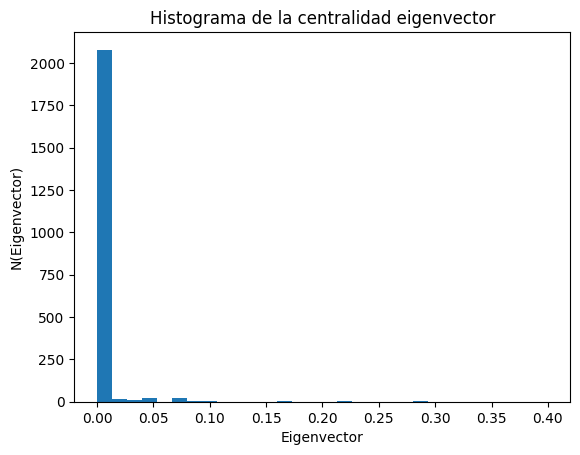

In [23]:
# Se calcula la centralidad eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.hist(list(eigenvector_centrality.values()), bins=30)
plt.title('Histograma de la centralidad eigenvector')
plt.xlabel("Eigenvector")
plt.ylabel ("N(Eigenvector)")
plt.show()

In [24]:
# Se calcula la centralidad eigenvector promedio
eigenvector_prom = np.mean(list(eigenvector_centrality.values()))
print(f"Centralidad eigenvector promedio: {eigenvector_prom}")

Centralidad eigenvector promedio: 0.0032176466219752346


In [25]:
# Se identifican los nodos con mayor centralidad eigenvector
topeigenvector = sorted(eigenvector_centrality.items(), key=itemgetter(1), reverse=True)[:10]
topeigenvector

[('Uber', 0.3999501608821021),
 ('Dfns', 0.2869358297922433),
 ('Figment', 0.28692302500342115),
 ('Shadowfax', 0.2782260385675328),
 ('Flipkart', 0.22605881721220358),
 ('PhonePe', 0.22605871745162248),
 ('GreyOrange', 0.22605862131869886),
 ('Pine Labs', 0.22605862131869886),
 ('Abra', 0.1652445517703954),
 ('2TM', 0.1651967805739966)]

El estudio de la centralidad de Eigenvector arroja luz sobre la importancia de ciertos actores que, aunque no siempre están al frente en términos de grado o centralidad de intermediación, demuestran ser fundamentales por sus conexiones con otros inversores influyentes. Este análisis pone de relieve a entidades como "Uber" y "Dfns", mostrando que su relevancia no deriva únicamente de la cantidad de conexiones, sino más bien de la calidad o importancia de estas conexiones dentro de la red.

La media de la centralidad de Eigenvector en la red es notablemente baja, lo que sugiere que, aunque la influencia se distribuye entre varios nodos, la mayoría tiene un papel relativamente modesto en términos de conectividad influyente. Sin embargo, existen excepciones notables, como "Uber", cuya centralidad de Eigenvector es excepcionalmente alta, destacando su posición privilegiada dentro de la red por estar conectado con otros actores clave.

En conclusión, el análisis de la centralidad de Eigenvector añade una dimensión adicional a nuestra comprensión de la estructura de la red, enfocándose en la calidad de las conexiones en lugar de en la cantidad. Este enfoque revela que algunos inversores, aunque no sean los más conectados en términos numéricos, ocupan posiciones estratégicas al estar enlazados a nodos de alta relevancia, subrayando la importancia de examinar la red desde múltiples ángulos para capturar todas las facetas de influencia y poder dentro de ella.

#### Medidas de transitividad

Las medidas de transitividad a explorar son:
- **Coeficiente de Clustering**: Cuantifica qué tan estrechamente conectados están los vecinos de un inversor entre sí. Esto identifica grupos muy unidos de inversores que probablemente colaboran o comparten información, formando grupos de inversión influyentes.

#### Coeficiente de Clustering

In [26]:
# Se calcula el valor del coeficiente de clustering de la red
coeficiente_clustering = nx.average_clustering(G)
print(f"Coeficiente de clustering: {coeficiente_clustering}")

Coeficiente de clustering: 0.004076693510252218


El coeficiente de clustering global de la red es de 0.004, un valor que subraya la tendencia mínima de los inversores a agruparse en comunidades densamente interconectadas. Esta cifra apunta hacia una red donde las conexiones entre los vecinos de un nodo (otros inversores conectados directamente a él) son escasas, indicando la ausencia de una propensión a formar triángulos cerrados o clusters altamente cohesionados. Este patrón puede reflejar varias características estructurales y dinámicas de la red de inversores:

- Estructura Abierta y Dinámica: La red muestra una distribución fluida de relaciones y flujos de capital, evitando la formación de grupos cerrados y posiblemente fomentando una mayor circulación de información e inversión a través de diferentes segmentos.
- Diversificación en Inversiones: Sugeriría que los inversores participan en una amplia gama de operaciones sin limitarse a círculos estrechos de coinversión, lo que podría indicar una estrategia de diversificación de sus carteras.
- Competitividad: La baja cohesión entre grupos puede también reflejar una atmósfera competitiva, donde, a pesar de las oportunidades para colaborar, prevalece un cierto grado de rivalidad que impide la formación de alianzas estables.

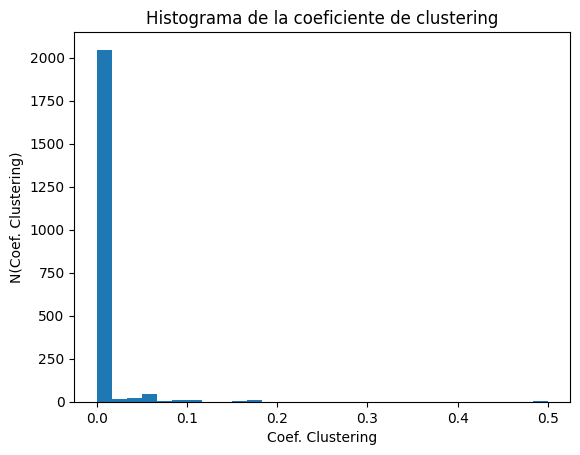

In [27]:
# Se calcula el coeficiente de clustering para cada nodo
clustering_coefficient = nx.clustering(G) 

plt.hist(list(clustering_coefficient.values()), bins=30)
plt.title('Histograma de la coeficiente de clustering')
plt.xlabel("Coef. Clustering")
plt.ylabel ("N(Coef. Clustering)")
plt.show()

In [28]:
top_10_clustering = sorted(clustering_coefficient.items(), key=itemgetter(1), reverse=True)[:10]
top_10_clustering 

[('BECO Capital', 0.5),
 ('Canary', 0.5),
 ('Datanomik', 0.3333333333333333),
 ('Axie Infinity', 0.25),
 ('Mina', 0.16666666666666666),
 ('Novartis', 0.16666666666666666),
 ('Info Edge', 0.16666666666666666),
 ('Mayo Clinic', 0.16666666666666666),
 ('National Institutes of Health', 0.16666666666666666),
 ('Prosus & Naspers', 0.16666666666666666)]

La exploración detallada del coeficiente de clustering a nivel individual desvela perspectivas intrigantes sobre la estructura de la red de inversores:

- Existencia de Micro-Clusters: A pesar de un coeficiente de clustering global bajo, la detección de nodos con coeficientes de 0.5, como "BECO Capital" y "Canary", destaca la presencia de micro-clusters o grupos bien interconectados dentro de la red. Estos valores indican que, aunque la red en su conjunto no tiende a la formación de clusters densos, hay sectores donde la colaboración y coinversión recurrente son la norma, creando islas de alta cohesión.

- Nuevas Figuras de Influencia: La lista de inversores con los coeficientes de clustering más altos introduce nuevos actores no necesariamente reconocidos en análisis centrados en medidas de centralidad. Esto sugiere que mientras entidades como "Tiger Global Management" son cruciales por sus extensas conexiones y posicionamiento estratégico, otros como "BECO Capital" y "Canary" se destacan en ámbitos más concentrados o nichos de inversión, demostrando la existencia de una diversidad de roles dentro de la red.

### Conclusion

El análisis combinado de las medidas de centralidad y transitividad revela una red de inversores heterogénea con dinámicas de información e inversión complejas. Existen claros actores centrales como "Tiger Global Management" y "Andreessen Horowitz," quienes son altamente conectados (grado). Por otro lado, "Animoca Brands" y "Tencent" fungen como puentes estratégicos (betweenness centrality) y "Uber" y "Dfns" están conectados a otros actores centrales (eigenvector centrality), lo cual refuerza su influencia potencial. Adicionalmente, hay presencia de grupos (clusters) de inversores fuertemente conectados entre sí, lo que sugiere colaboración consistente y formación de nichos de inversión especializados. No obstante, una fracción significativa de la red presenta escasa tendencia a formar clusters, lo que puede indicar diversidad de estrategias o competencia limitada entre algunos actores.

### Recomendaciones preliminares

1. Foco en Actores Centrales: Invertir tiempo en comprender la estrategia, preferencias y conexiones de inversores centrales como "Tiger Global Management" puede traer información valiosa sobre flujos de capital y tendencias dominantes en la red.

2. Exploración de Clusters: Identificar y estudiar detalladamente los clusters densamente conectados permite develar sinergias de inversión, intereses especializados y líderes dentro de ellos.

3. Mapeo de Nichos: Profundizar en inversores con patrones de clustering atípico (muy alto o muy bajo), en conjunto con sus atributos,  sectores, y ubicación, ayuda a caracterizar potenciales nichos y estrategias de inversión poco convencionales.

4. Combinación de Datos: Cruzar la información de la red con características extrínsecas de los inversores (por ejemplo sectores) enriquece el análisis y genera recomendaciones de inversión más personalizadas y robustas.